In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import illustris_python as il
import os

test_name = "simple_00002"
new_cat_path = "../data/tng-100-3/catalogues/test_runs/" + test_name + "/"
#For comparing
old_cat_path = "../data/tng-100-3/output"


In [2]:
def load_old_cat(path):
    subhalo_fields = ["SubhaloMass", 'SubhaloMassType', "SubhaloMassInHalfRadType", "SubhaloHalfmassRadType", "SubhaloPos", "SubhaloVel",               "SubhaloSpin"]
    df = il.pandasformat.dict_to_pandas(il.groupcat.loadSubhalos(old_cat_path, 99, fields=subhalo_fields))
    return df

In [3]:
def create_cat(path):
    df = pd.DataFrame()
    for filename in os.listdir(path):
        temp = pd.read_pickle(path + filename)
        df_temp = pd.concat([df, temp])
        df_temp = df_temp.sort_values(by="id") 
        df = df_temp.reset_index(drop=True)
    return df

In [4]:
old_cat = load_old_cat(old_cat_path)
new_cat = create_cat(new_cat_path)
print(new_cat.keys())

Index(['id', 'SubhaloGalaxyRad', 'SubhaloRad', 'SubhaloPosX', 'SubhaloPosY',
       'SubhaloPosZ', 'SubhaloMassStellar', 'SubhaloVelX', 'SubhaloVelY',
       'SubhaloVelZ', 'SubhaloHalfmassRadStellar', 'RotationAxisX',
       'RotationAxisY', 'RotationAxisZ', 'SubhaloMassGas', 'SubhaloMassDm',
       'SubhaloMassTotal'],
      dtype='object')


In [5]:
indices = new_cat["id"]
print("Masses check")
for i in range(10):
    print("Group catalogue: ", old_cat["SubhaloMassStellar"][indices[i]], " Snapshot: ", new_cat["SubhaloMassStellar"][i])
for i in range(300, 320):
    print("Group catalogue: ", old_cat["SubhaloMassStellar"][indices[i]], " Snapshot: ", new_cat["SubhaloMassStellar"][i])

Masses check
Group catalogue:  154.8157  Snapshot:  93.82546997070312
Group catalogue:  191.96112  Snapshot:  133.2349090576172
Group catalogue:  96.50457  Snapshot:  75.95954895019531
Group catalogue:  81.445526  Snapshot:  56.2550163269043
Group catalogue:  90.83128  Snapshot:  64.34422302246094
Group catalogue:  150.73384  Snapshot:  119.21247100830078
Group catalogue:  64.49429  Snapshot:  50.25973892211914
Group catalogue:  141.8573  Snapshot:  105.70452117919922
Group catalogue:  139.96591  Snapshot:  113.53864288330078
Group catalogue:  118.564255  Snapshot:  94.36190032958984
Group catalogue:  16.179108  Snapshot:  14.308484077453613
Group catalogue:  10.26007  Snapshot:  8.855040550231934
Group catalogue:  14.066554  Snapshot:  13.079544067382812
Group catalogue:  11.64311  Snapshot:  10.320374488830566
Group catalogue:  13.7478  Snapshot:  12.071949005126953
Group catalogue:  11.733854  Snapshot:  10.323807716369629
Group catalogue:  10.155548  Snapshot:  8.574952125549316
Gr

In [6]:
print("Masses check")
for i in range(10):
    print("Group catalogue: ", old_cat["SubhaloHalfmassRadStellar"][indices[i]], " Snapshot: ", new_cat["SubhaloHalfmassRadStellar"][i])
for i in range(300, 320):
    print("Group catalogue: ", old_cat["SubhaloHalfmassRadStellar"][indices[i]], " Snapshot: ", new_cat["SubhaloHalfmassRadStellar"][i])

Masses check
Group catalogue:  88.33855  Snapshot:  27.580284349982733
Group catalogue:  58.37313  Snapshot:  26.033512539278288
Group catalogue:  19.984846  Snapshot:  11.746437376572095
Group catalogue:  35.77964  Snapshot:  12.059458072248278
Group catalogue:  33.382057  Snapshot:  12.907032490199846
Group catalogue:  32.648647  Snapshot:  21.24463328085522
Group catalogue:  23.77969  Snapshot:  14.533329013418923
Group catalogue:  33.215683  Snapshot:  18.984417377066787
Group catalogue:  31.95738  Snapshot:  22.632799412644648
Group catalogue:  35.298717  Snapshot:  23.713963078716265
Group catalogue:  11.645008  Snapshot:  9.568207628137369
Group catalogue:  8.518495  Snapshot:  6.423757187150129
Group catalogue:  6.0803924  Snapshot:  5.063892700222418
Group catalogue:  7.8089066  Snapshot:  5.983969609274534
Group catalogue:  8.764024  Snapshot:  6.903091169012781
Group catalogue:  6.9061656  Snapshot:  5.478981294179254
Group catalogue:  6.4534225  Snapshot:  4.679476439670275

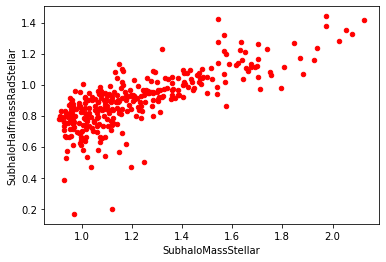

In [10]:
new_cat_log = il.formatplot.log_formater(new_cat)
fig, ax = plt.subplots()
new_cat_log.plot.scatter(y="SubhaloHalfmassRadStellar", x="SubhaloMassStellar", color = "red", ax = ax)

plt.show()